# Airy Disk

In [128]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))
import fourieroptics as fo

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from fourieroptics.propagation import fresnel_tf_2D, angular_spectrum_2D
from fourieroptics.masks import pinhole_2D as fo_pinhole_2D

# --- Parameters ---
wavelength = 632.8e-9     # HeNe laser (m)
aperture_radius = 25e-6   # 50 µm
N = int(1e4)                  # grid size
dx = 0.1e-7                 # grid spacing (2 µm)

# --- Coordinates ---
x = np.linspace(-N/2, N/2 - 1, N) * dx
X, Y = np.meshgrid(x, x)

# --- Input field: circular aperture ---
aperture = fo.pinhole_2D(X, Y, aperture_radius)

# --- Propagate using Fresnel transfer function ---
z = (np.pi * aperture_radius**2) / (250*wavelength)
U = fo.angular_spectrum_2D(aperture, dx, wavelength, z)
I = np.abs(U)**2
I /= I.max()  # normalize

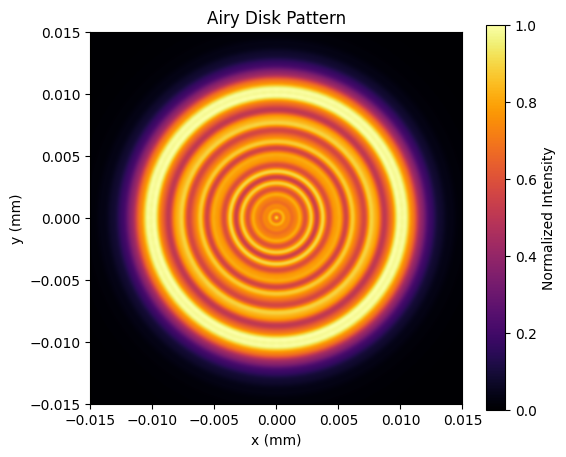

In [130]:
# --- Plot result ---
plt.figure(figsize=(6, 5))
plt.imshow(I, extent=[x[0]*1e3, x[-1]*1e3, x[0]*1e3, x[-1]*1e3], cmap='inferno')
plt.title("Airy Disk Pattern")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.xlim(-0.015, 0.015)
plt.ylim(-0.015, 0.015)
plt.colorbar(label='Normalized Intensity')
plt.show()